In [2]:
from sklearn import linear_model 
import pandas as pd
reg = linear_model.LinearRegression()


In [3]:
reg.fit([[0, 0], [1, 1], [2, 2]], [0, 1, 2])
coefficients = reg.coef_
print(coefficients)

# linear regression model is trained to predict values ​​[0, 1, 2]
# based on input features [[0, 0], [1, 1], [2, 2]]. In this context, the values ​​are [0, 1, 2]
# are the target variables that the model is trying to learn to predict.

# If the output is [0.5, 0.5], it means that the model has learned coefficients of 0.5 for each of the two features.
# This means that the model's prediction for a new example will be equal to the sum of the products of the weights and the corresponding
# feature values, and in this case it will be y(n) = (0.5 * x1) + (0.5 * x2),
# where x1 and x2 are the values ​​of two features.
# a y(n) - corresponding target value from array [0, 1, 2]
# thus, if we take the array [0, 0] and the corresponding target value - 0 and substitute the predicted coefficients
# [0.5 and 0.5], then we get the formula: 0 = (0.5 * 0) + (0.5 * 0)

[0.5 0.5]


In [4]:
from sklearn.datasets import load_iris
iris = load_iris()
data = pd.DataFrame(data = iris.data, columns = iris.feature_names)

In [5]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


<Axes: title={'center': 'Plot #1'}, xlabel='sepal length (cm)', ylabel='petal length (cm)'>

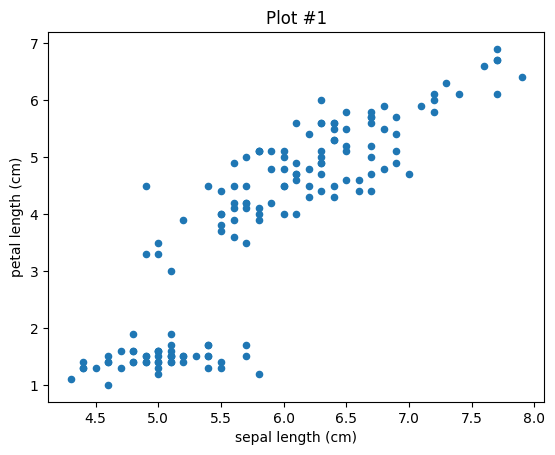

In [6]:
data.plot.scatter(x="sepal length (cm)", y = 'petal length (cm)', title = "Plot #1")

In [7]:
y = data['petal width (cm)'].values.reshape(-1, 1)
x = data['petal length (cm)'].values.reshape(-1, 1)


# .values: This is a Pandas DataFrame attribute that returns data as a NumPy array.

# .reshape(-1, 1): This is a NumPy array method that reshapes the array. -1 means
# that the dimension will be calculated automatically based on the remaining dimensions.
# So .reshape(-1, 1) is used to convert a one-dimensional array to a two-dimensional array,
# where the first dimension (rows) is calculated automatically, and the second dimension (columns) is equal to 1.



In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [9]:
model = LinearRegression()

model.fit(x_train, y_train)

LinearRegression()

In [10]:
model.score(x_train, y_train)

0.9236026470263949

In [11]:
model.score(x_test, y_test)

0.9398938557178945

In [12]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'fit_intercept': [True, False], ## (default=True): Determines whether to include a dummy term in the model (y = mx + b).
    'copy_X': [True, False], # default=True): If set to True, X will be copied; otherwise, it may be overwritten.
    'n_jobs': [None, -1], # (default=None): Defines the number of parallel running processes. If None, then 1. If -1, then all available processor cores are used.
    'positive': [True, False]
}


grid_search = GridSearchCV(model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

In [13]:
grid_search.fit(x_test, y_test)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False], 'n_jobs': [None, -1],
                         'positive': [True, False]},
             scoring='neg_mean_squared_error')

In [14]:
model = grid_search.best_estimator_

In [15]:
model.score(x_test, y_test)

0.9436799734709038

In [16]:
model.score(x_train, y_train)

0.9189868342307579

In [25]:
n = 7
pred = model.predict(x_test[[n]])
print(f"Actual value is {y_test[[n]]} \nPredicted value is {pred}")

Actual value is [[2.1]] 
Predicted value is [[2.15535709]]


In [26]:
pred = model.predict(x_test)
data_pred = pd.DataFrame({"Actual": y_test.squeeze(), "Predicted": pred.squeeze()})
print(data_pred)

    Actual  Predicted
0      1.5   1.552001
1      1.1   0.905548
2      1.2   1.293420
3      0.2   0.129804
4      0.2   0.302192
5      0.3   0.215998
6      1.1   1.250323
7      2.1   2.155357
8      1.4   1.595098
9      0.2   0.345289
10     1.3   1.508904
11     1.0   1.121032
12     1.9   1.810582
13     0.2   0.259095
14     0.2   0.259095
15     1.8   1.681292
16     1.3   1.336517
17     0.4   0.259095
18     1.8   1.681292
19     2.3   1.939873
20     1.0   1.121032
21     0.3   0.259095
22     0.4   0.259095
23     2.4   2.026066
24     1.8   2.327745
25     0.2   0.215998
26     2.3   2.069163
27     0.2   0.215998
28     1.3   1.379613
29     1.8   1.724388


In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)

# Calculate root mean square error (RMSE) and root mean absolute error (RMAE).
r_mse = np.sqrt(mse)
r_mae = np.sqrt(mae)

print(mae)
print(mse)


print(r_mae)
print(r_mse)

# This code calculates two different error metrics - mean absolute error (MAE) and mean square error (MSE)
# - to compare the actual and predicted values ​​of your models.
# It then calculates the roots of these errors, forming what is called root mean absolute error (RMSE)
# and root mean square error (RMSE). Your conclusions:

# MAE (Mean Absolute Error): This is the average absolute value of the difference between the actual
# and predicted values. A value of 0.1359 means that on average your model is wrong
# by 0.1359 in absolute value.

# MSE (Mean Square Error): This is the average of the squares of the difference between the actual and predicted values.
# The value 0.0310 represents the root mean square error.

# RMSE (root mean square error): Root of MSE.
# The value 0.1759 is the root of the root mean square error,
# which is also interpreted as the standard deviation of the error.

# RMAE (root mean absolute error):
# Root of MAE. The value 0.3687 is the root of the mean absolute error,
# also interpreted as the standard deviation of the error.

# The closer the MAE, MSE, RMSE and RMAE values ​​are to zero, the better the model.
# In this case, the model seems to do a good job of predicting
# because the error values ​​are small.







0.13591389639997875
0.0309735114787127
0.36866501922474115
0.17599293019525727
